In an attempt to enter the field of Machine Learning and Deep Learning, this notebook hopefully can be used as reference for future projects.

This notebook will be covering the MNIST data set, which is considered the "Hello World" of Deep Learning

## **Importing All The Libraries Needed**

In [38]:
import numpy as np
import pandas as pd
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


## Loading Datasets

In [0]:
train = pd.read_csv('drive/Colab Notebooks/Digit Recognizer/train.csv')
test = pd.read_csv('drive/Colab Notebooks/Digit Recognizer/test.csv')



## First Look At Our Dataset

There are a total of 784 pixels to each image and they are all given a number (label) 0-9. With 784 pixels to a square image that means we have a 28x28 grid.

In [40]:
print(train.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

## **Preparing Data**

We first need to do some "cleaning" of the data, including some one hot encoding and data reshaping.

In [0]:
# Defining our inputs and replacing any na's with 0's (a whitespace)
xTrain = train.fillna(0)
xTest = test.fillna(0)

# One hot encoding our labels
from tensorflow.python.keras.utils.np_utils import to_categorical
yTrain = to_categorical(xTrain['label'])
del xTrain['label']

# Reshape to look like an actual square
xTrain = xTrain.values.reshape(-1,28,28,1)
xTest = xTest.values.reshape(-1,28,28,1)

## Look At  Our Images

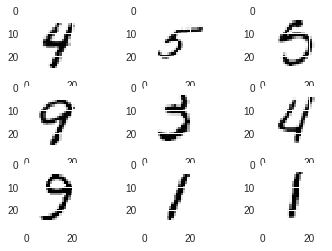

In [42]:
import random

displayList = []

# Pick out some random image
for x in range(9):
  displayList.append(random.randint(1, len(xTrain)+1))

#Show them off
for x in range(len(displayList)):
  plt.subplot(331 + x )
  plt.imshow(xTrain[displayList[x]][:,:,0])
  
  

## Create an Image Generator for Even More Images

In [0]:
dataGenerator = ImageDataGenerator(zoom_range=.1, height_shift_range=.1, width_shift_range=.1)

## Building Our Neural Network

Here we'll be using Sequential, which is a kind of model Keras has. Keras has very easy to read documentation found at https://keras.io/

I'll briefly explain each part of the Neural Network.

**Sequential** - A linear stack of layers.

**Conv2D** - A layer of spatial convolution over images.

**Dropout** - Randomly chooses inputs to be ignored with a percent chance (.25 means 25% chance).

**Flatten** - Flattens the input without affecting batch size.

**Dense** - A densely connected Neural Network layer


**Our layout:**

2x 2D Convolution Layers (The first is our initial input)

25% Dropout Layer

2x 2D Convolution Layers

25% Dropout Layer

Flatten

Dense Layer (Final Layer)



In [0]:
model = Sequential()

# Input Layer
model.add(Conv2D(20,kernel_size=(3,3),activation='relu', input_shape=(imageRows, imageCol, 1)))

# Hidden Layers
model.add(Conv2D(20,kernel_size=(3,3),activation='relu'))
model.add(Dropout(.25))
model.add(Conv2D(20,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(20,kernel_size=(3,3),activation='relu'))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

## Compiling The Model

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

## Fit The Model

In [48]:
model.fit_generator(dataGenerator.flow(xTrain, yTrain, batch_size = 16),
                    steps_per_epoch = 500,
                   epochs=20)

yPred = model.predict(xTest)

Epoch 1/20
500/500 [==============================] - 31s 62ms/step - loss: 0.2561 - acc: 0.9225
Epoch 2/20
290/500 [================>.............] - ETA: 13s - loss: 0.2575 - acc: 0.9190

500/500 [==============================] - 31s 62ms/step - loss: 0.2448 - acc: 0.9216
Epoch 3/20
470/500 [===========================>..] - ETA: 1s - loss: 0.2032 - acc: 0.9332

500/500 [==============================] - 31s 62ms/step - loss: 0.2038 - acc: 0.9329
Epoch 4/20
500/500 [==============================] - 31s 62ms/step - loss: 0.1931 - acc: 0.9377
Epoch 5/20
 32/500 [>.............................] - ETA: 28s - loss: 0.1780 - acc: 0.9473

500/500 [==============================] - 30s 61ms/step - loss: 0.1662 - acc: 0.9500
Epoch 6/20
353/500 [====================>.........] - ETA: 8s - loss: 0.1751 - acc: 0.9458

500/500 [==============================] - 30s 61ms/step - loss: 0.1748 - acc: 0.9450
Epoch 7/20
499/500 [============================>.] - ETA: 0s - loss: 0.1820 - acc: 0.9445

500/500 [==============================] - 31s 62ms/step - loss: 0.1817 - acc: 0.9446
Epoch 8/20
387/500 [======================>.......] - ETA: 7s - loss: 0.1479 - acc: 0.9519

500/500 [==============================] - 32s 63ms/step - loss: 0.1515 - acc: 0.9529
Epoch 9/20
500/500 [==============================] - 31s 63ms/step - loss: 0.1631 - acc: 0.9520
Epoch 10/20
  8/500 [..............................] - ETA: 31s - loss: 0.0583 - acc: 0.9922

500/500 [==============================] - 31s 62ms/step - loss: 0.1430 - acc: 0.9547
Epoch 11/20
340/500 [===================>..........] - ETA: 9s - loss: 0.1430 - acc: 0.9566 

500/500 [==============================] - 31s 62ms/step - loss: 0.1462 - acc: 0.9570
Epoch 12/20
490/500 [============================>.] - ETA: 0s - loss: 0.1434 - acc: 0.9589

500/500 [==============================] - 31s 62ms/step - loss: 0.1430 - acc: 0.9589
Epoch 13/20
500/500 [==============================] - 31s 62ms/step - loss: 0.1357 - acc: 0.9569
Epoch 14/20
 36/500 [=>............................] - ETA: 29s - loss: 0.1078 - acc: 0.9705

500/500 [==============================] - 31s 63ms/step - loss: 0.1286 - acc: 0.9610
Epoch 15/20
351/500 [====================>.........] - ETA: 9s - loss: 0.1274 - acc: 0.9644

500/500 [==============================] - 31s 62ms/step - loss: 0.1258 - acc: 0.9654
Epoch 16/20
495/500 [============================>.] - ETA: 0s - loss: 0.1396 - acc: 0.9563

500/500 [==============================] - 31s 62ms/step - loss: 0.1395 - acc: 0.9561
Epoch 17/20
500/500 [==============================] - 31s 62ms/step - loss: 0.1233 - acc: 0.9644
Epoch 18/20
 37/500 [=>............................] - ETA: 28s - loss: 0.0940 - acc: 0.9662

500/500 [==============================] - 31s 62ms/step - loss: 0.1196 - acc: 0.9641
Epoch 19/20
353/500 [====================>.........] - ETA: 9s - loss: 0.1196 - acc: 0.9680

500/500 [==============================] - 31s 62ms/step - loss: 0.1204 - acc: 0.9659
Epoch 20/20
496/500 [============================>.] - ETA: 0s - loss: 0.1235 - acc: 0.9618

500/500 [==============================] - 31s 61ms/step - loss: 0.1230 - acc: 0.9620


## Create CSV File for Submission

In [0]:
#Give every pic an id

picID = pd.Series(x for x in range(1, len(xTest) + 1))

#Undo one hot encoding
yPredFinal = pd.Series(np.argmax(np.round(yPred), axis=1))

#Export
myFile = pd.DataFrame({'ImageId': picID, 'Label': yPredFinal})
myFile = myFile.to_csv('submission1.csv', index=False)